In [1]:
import os,glob
import h5py
import pylab
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
time = np.arange(-5,11,1)

In [4]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
lnb_220={}
lnb_221={}

In [6]:
for t in time:
    if t<0:
        name = 'M'+str(-t)+'MS'
    else:
        name = str(t)+'MS'
    print(name)
    try:
        f220=h5py.File('./srate1024220/4ogcringdown_output/samples_files/H1L1V1-INFERENCE_GW150914_'+name+'-1126259200-400.hdf','r')
        f221=h5py.File('./srate1024220_221/4ogcringdown_output/samples_files/H1L1V1-INFERENCE_GW150914_'+name+'-1126259200-400.hdf','r')
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
    except FileNotFoundError:
        pass
    

M5MS
M4MS
M3MS
M2MS
M1MS
0MS
1MS
2MS
3MS
4MS
5MS
6MS
7MS
8MS
9MS
10MS


In [7]:
lnb_220

{-5: -450434.2710811746,
 -4: -450427.26917381794,
 -3: -450423.75631256605,
 -2: -450423.128617052,
 -1: -450407.491073027,
 0: -450400.63109101175,
 3: -450390.60016394506,
 5: -450391.1302621935,
 6: -450389.81336974056,
 7: -450388.7083106347,
 8: -450388.7374605942,
 9: -450383.0641872815,
 10: -450382.8518648771}

In [8]:
lnb_221

{-5: -450412.54524055554,
 -4: -450413.00089144043,
 -3: -450409.26997138053,
 -2: -450398.3033305333,
 -1: -450390.97889836004,
 0: -450394.9284906298,
 3: -450392.0205405532,
 5: -450392.15936004615,
 6: -450389.81578870025,
 7: -450387.5578409002,
 8: -450388.79048697784,
 9: -450383.15749899653,
 10: -450382.9939302829}

In [11]:
label=['220','220+221']
for i,dic in enumerate([lnb_220,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o',ms=8)
#plt.scatter(4,threemode.attrs['log_evidence'],marker='^',color='black',label='220+330+440')
#plt.axvline(0.004632083954953592*1000,ls='--',label='$10M_f$')
plt.legend()
plt.title('GW150914 (cpnest)')
plt.ylabel('$\ln B$')
plt.xlim(-4,10)
plt.xticks(np.arange(-4,11,1))
#plt.ylim(-898750,-898720)
plt.xlabel('$t-t_\mathrm{ref}$ ms')

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

In [25]:
x1,y1=zip(*lnb_220.items())
x2,y2=zip(*lnb_221.items())

In [27]:
y1

(-450434.2710811746,
 -450427.26917381794,
 -450423.75631256605,
 -450423.128617052,
 -450407.491073027,
 -450400.63109101175,
 -450390.60016394506,
 -450391.1302621935,
 -450389.81336974056,
 -450388.7083106347,
 -450388.7374605942,
 -450383.0641872815,
 -450382.8518648771)

# Comparison of 220+221 and 220

In [36]:
x1,y1=zip(*lnb_220.items())
x2,y2=zip(*lnb_221.items())
plt.plot(np.array(x1),np.log10(np.e**(np.array(y2)-np.array(y1))),label='$\log_{10} B^{220+221}_{220}$',marker='o',ms=8)
#plt.scatter(4,threemode.attrs['log_evidence'],marker='^',color='black',label='220+330+440')
#plt.axvline(0.004632083954953592*1000,ls='--',label='$10M_f$')
plt.legend()
plt.title('GW150914 (cpnest)')
plt.ylabel('$\log_{10} B$')
plt.xlim(-4,10)
plt.xticks(np.arange(-4,11,1))
#plt.ylim(-898750,-898720)
plt.xlabel('$t-t_\mathrm{ref}$ ms')

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

In [37]:
import lal

In [39]:
lal.MTSUN_SI * 70 * 4

0.0013791374871522013

Text(0.5, 1.0, 'Cotesta et al Paper')

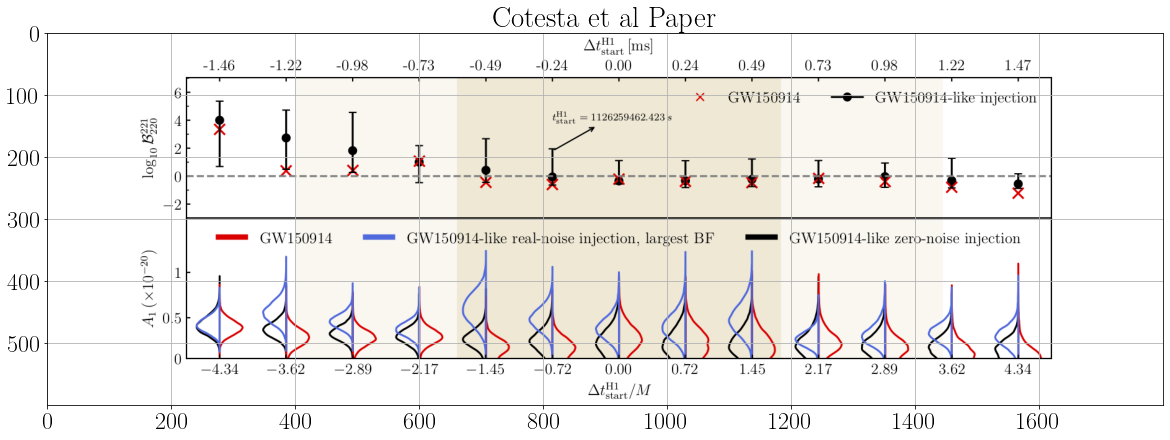

In [22]:
import matplotlib.image as mpimg
img = mpimg.imread('../arxiv/BF_and_amp_N1_vs_N0_vary_time.png')
plt.figure(figsize=[20,10])
plt.imshow(img)
plt.title('Cotesta et al Paper')

In [23]:
h = open("./srate1024220/4ogcringdown_output/config_files/inference-GW150914_0ms.ini", "r")
for line in h:
    print (line)
h.close()

[data]

instruments = H1 L1

trigger-time = 1126259462.4077973

frame-files = H1:/work/yifan.wang/GWOSC-data/gwtc_1/H-H1_GWOSC_16KHZ_R1-1126257415-4096.gwf L1:/work/yifan.wang/GWOSC-data/gwtc_1/L-L1_GWOSC_16KHZ_R1-1126257415-4096.gwf

channel-name = H1:GWOSC-16KHZ_R1_STRAIN L1:GWOSC-16KHZ_R1_STRAIN

analysis-start-time = -4

analysis-end-time = 4

data-conditioning-low-freq = H1:0 L1:0 V1:0

psd-estimation = median-mean

psd-start-time = -256

psd-end-time = 256

psd-inverse-length = 8

psd-segment-length = 8

psd-segment-stride = 4

sample-rate = 1024

strain-high-pass = 10

pad-data = 8



[sampler]

name = cpnest

nlive = 2048

maxmcmc = 2048

nthreads = 16

verbose = 2

seed = 1234



[model]

name = gated_gaussian_margpol

low-frequency-cutoff = 15

check-for-valid-times = 

shift-psd-times-to-valid = 



[variable_params]

final_mass = 

final_spin = 

inclination = 

logamp220 = 

phi220 = 



[static_params]

approximant = TdQNMfromFinalMassSpin

harmonics = spheroidal

tref = 